In [ ]:
import pandas as pd
import numpy as np

boston = pd.read_csv("/content/boston_housing.csv")
# Instead of boston.data and boston.feature_names, use boston.values and boston.columns
data = pd.DataFrame(boston.values, columns=boston.columns)

# Adding a target variable for house prices
data['PRICE'] = target

# Let's focus on the 'PRICE' column as the time series data
price_data = data['PRICE']

# You can now continue with your analysis using the 'data' DataFrame
print(data.head()) #For example to view the first few rows of the dataframe

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


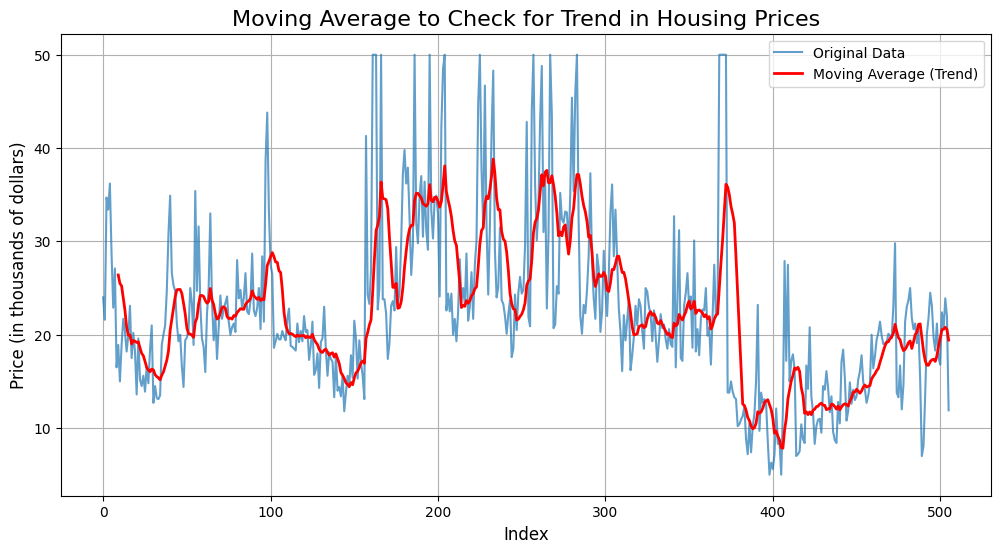

In [ ]:
window_size = 10
moving_avg = data['PRICE'].rolling(window=window_size).mean()

# Plot original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(data['PRICE'], label='Original Data', alpha=0.7)
plt.plot(moving_avg, label='Moving Average (Trend)', color='red', linewidth=2)
plt.title('Moving Average to Check for Trend in Housing Prices', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price (in thousands of dollars)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sort the price data and treat it as a time series
price_data = price_data.sort_values().reset_index(drop=True)

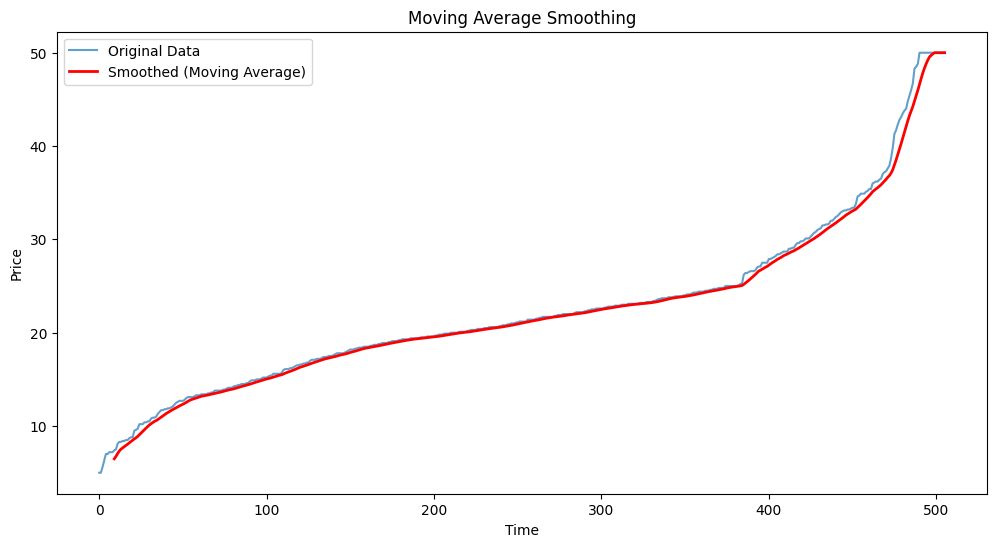

In [ ]:
import matplotlib.pyplot as plt
# Apply a moving average to remove short-term fluctuations
window_size = 10  # You can adjust this depending on how much smoothing you want
moving_avg = price_data.rolling(window=window_size).mean()

# Plot the original data and moving average
plt.figure(figsize=(12, 6))
plt.plot(price_data, label='Original Data', alpha=0.7)
plt.plot(moving_avg, label='Smoothed (Moving Average)', color='red', linewidth=2)
plt.title('Moving Average Smoothing')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

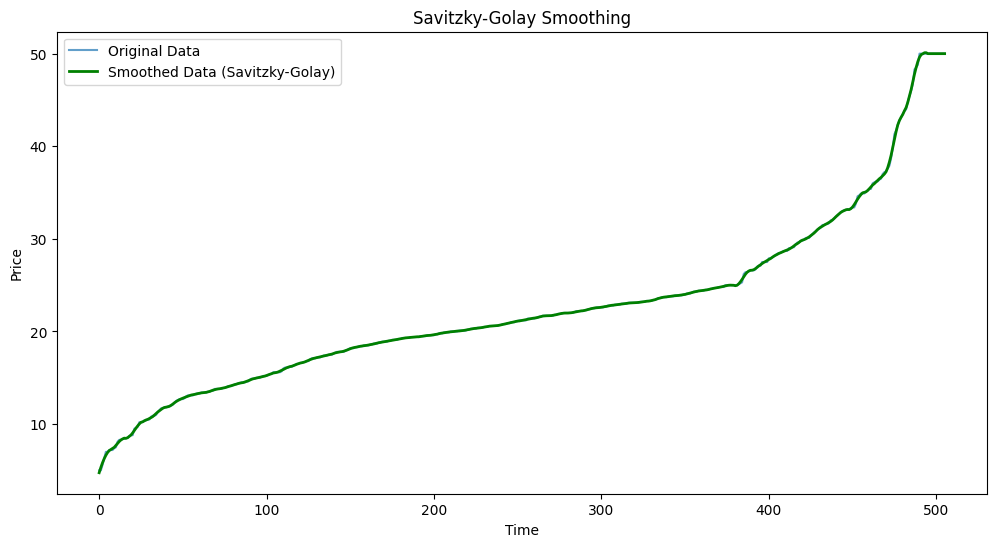

In [ ]:
from scipy.signal import savgol_filter
# Apply Savitzky-Golay filter to smooth the data
smoothed_data = savgol_filter(price_data, window_length=11, polyorder=2)

# Plot the original data and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(price_data, label='Original Data', alpha=0.7)
plt.plot(smoothed_data, label='Smoothed Data (Savitzky-Golay)', color='green', linewidth=2)
plt.title('Savitzky-Golay Smoothing')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

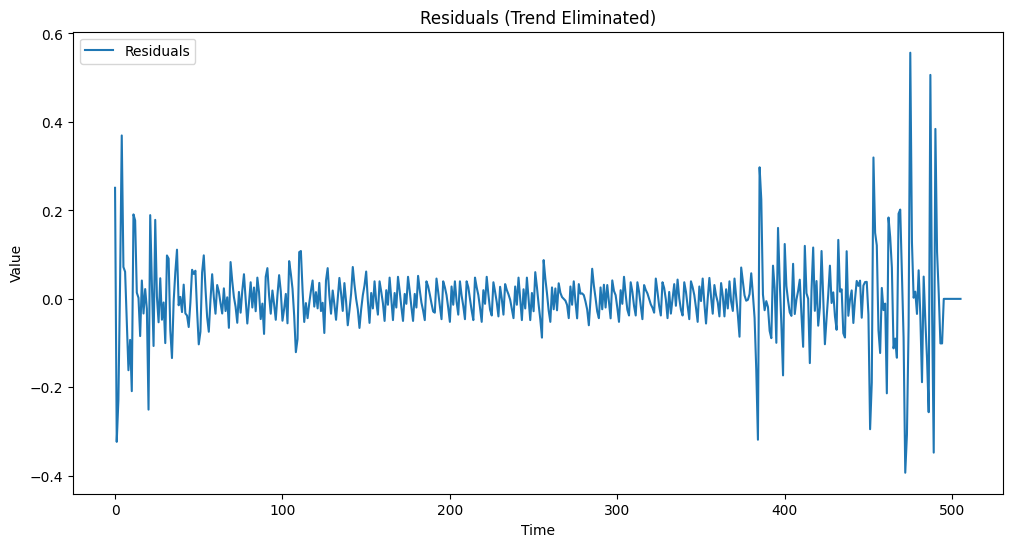

In [ ]:
# Calculate the residuals (difference between original and smoothed data)
residuals = price_data - smoothed_data

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Trend Eliminated)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

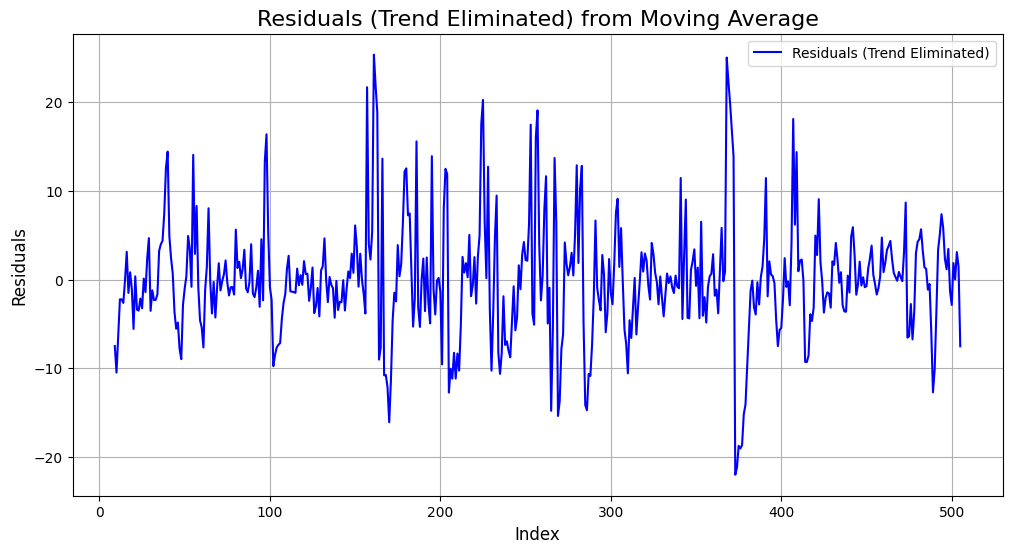

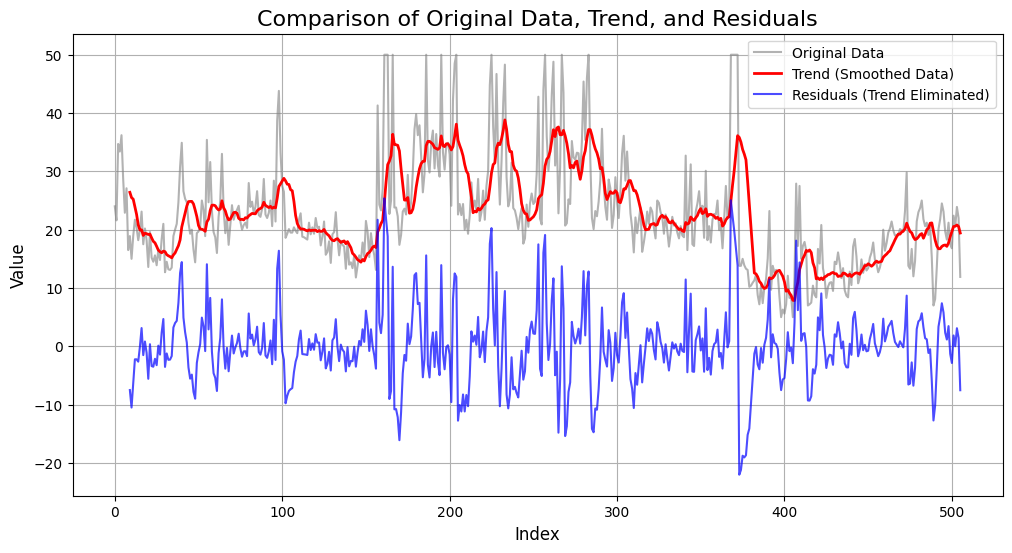

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston # This line is removed

# Instead of using load_boston, load the dataset from the original source:
boston = pd.read_csv("/content/boston_housing.csv")
# Instead of boston.data and boston.feature_names, use boston.values and boston.columns
data = pd.DataFrame(boston.values, columns=boston.columns)
data['PRICE'] = target  # Adding the target variable for house prices

# Step 1: Eliminate the trend using moving average (window_size = 10)
window_size = 10
smoothed_data = data['PRICE'].rolling(window=window_size).mean()

# Step 2: Calculate the residuals (difference between original and smoothed data)
residuals = data['PRICE'] - smoothed_data

# Step 3: Plot the residuals to check if trend was eliminated
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals (Trend Eliminated)', color='blue')
plt.title('Residuals (Trend Eliminated) from Moving Average', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Plot the original data, trend (smoothed data), and residuals for comparison
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(data['PRICE'], label='Original Data', color='gray', alpha=0.6)

# Plot the trend (smoothed data)
plt.plot(smoothed_data, label='Trend (Smoothed Data)', color='red', linewidth=2)

# Plot the residuals (difference between original and trend)
plt.plot(residuals, label='Residuals (Trend Eliminated)', color='blue', alpha=0.7)

# Add titles and labels
plt.title('Comparison of Original Data, Trend, and Residuals', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()